# Model Training

In [19]:
%pip install numpy pandas matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
dataset = pd.read_csv("data.csv", encoding='latin-1')

In [23]:
print(dataset.shape)

(6103, 11)


In [24]:
dataset.sample(5)

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
3936,2003400,Saashini,25,98.6,75,120,89,19.0,40,6.0,low risk
543,2010299,Pinaakadharini,20,98.6,84,123,85,19.7,38,5.7,low risk
2649,2010233,Desna,33,98.6,87,130,92,24.3,33,6.3,mid risk
2421,2003219,Jayati,20,98.4,144,163,103,22.1,35,5.5,high risk
171,2011527,Haiya,23,98.6,78,126,88,18.6,40,5.9,low risk


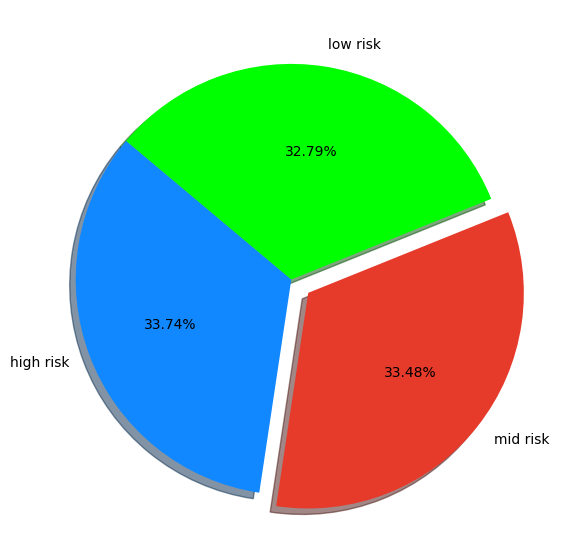

In [25]:
#piechart of target features
percentage = dataset['Outcome'].value_counts(normalize=True) * 100
labels = ['high risk', 'mid risk', 'low risk']
fig, ax = plt.subplots(figsize=(12,7))
explode = (0, 0.1,0)
colors = ['#1188ff','#e63a2a','#00FF00']
ax.pie(percentage, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.show()

In [26]:
dataset.isnull().sum()

Patient ID                           0
Name                                 0
Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64

In [27]:
# Map RiskLevel to integer values
risk_mapping = {"low risk": 0, "mid risk": 1, "high risk": 2}
dataset["Outcome"] = dataset["Outcome"].map(risk_mapping)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 524.6+ 

In [28]:
dataset.duplicated().sum()

np.int64(0)

In [29]:
#drop unrelated columns
dataset.drop(['Patient ID','Name'], axis=1, inplace=True)

In [30]:
dataset.describe()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
count,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,26.425037,98.665574,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752,1.009504
std,6.390205,1.590983,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327,0.815638
min,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000,0.000000
25%,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000,0.000000
50%,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000,1.000000
75%,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000,2.000000
max,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000,2.000000


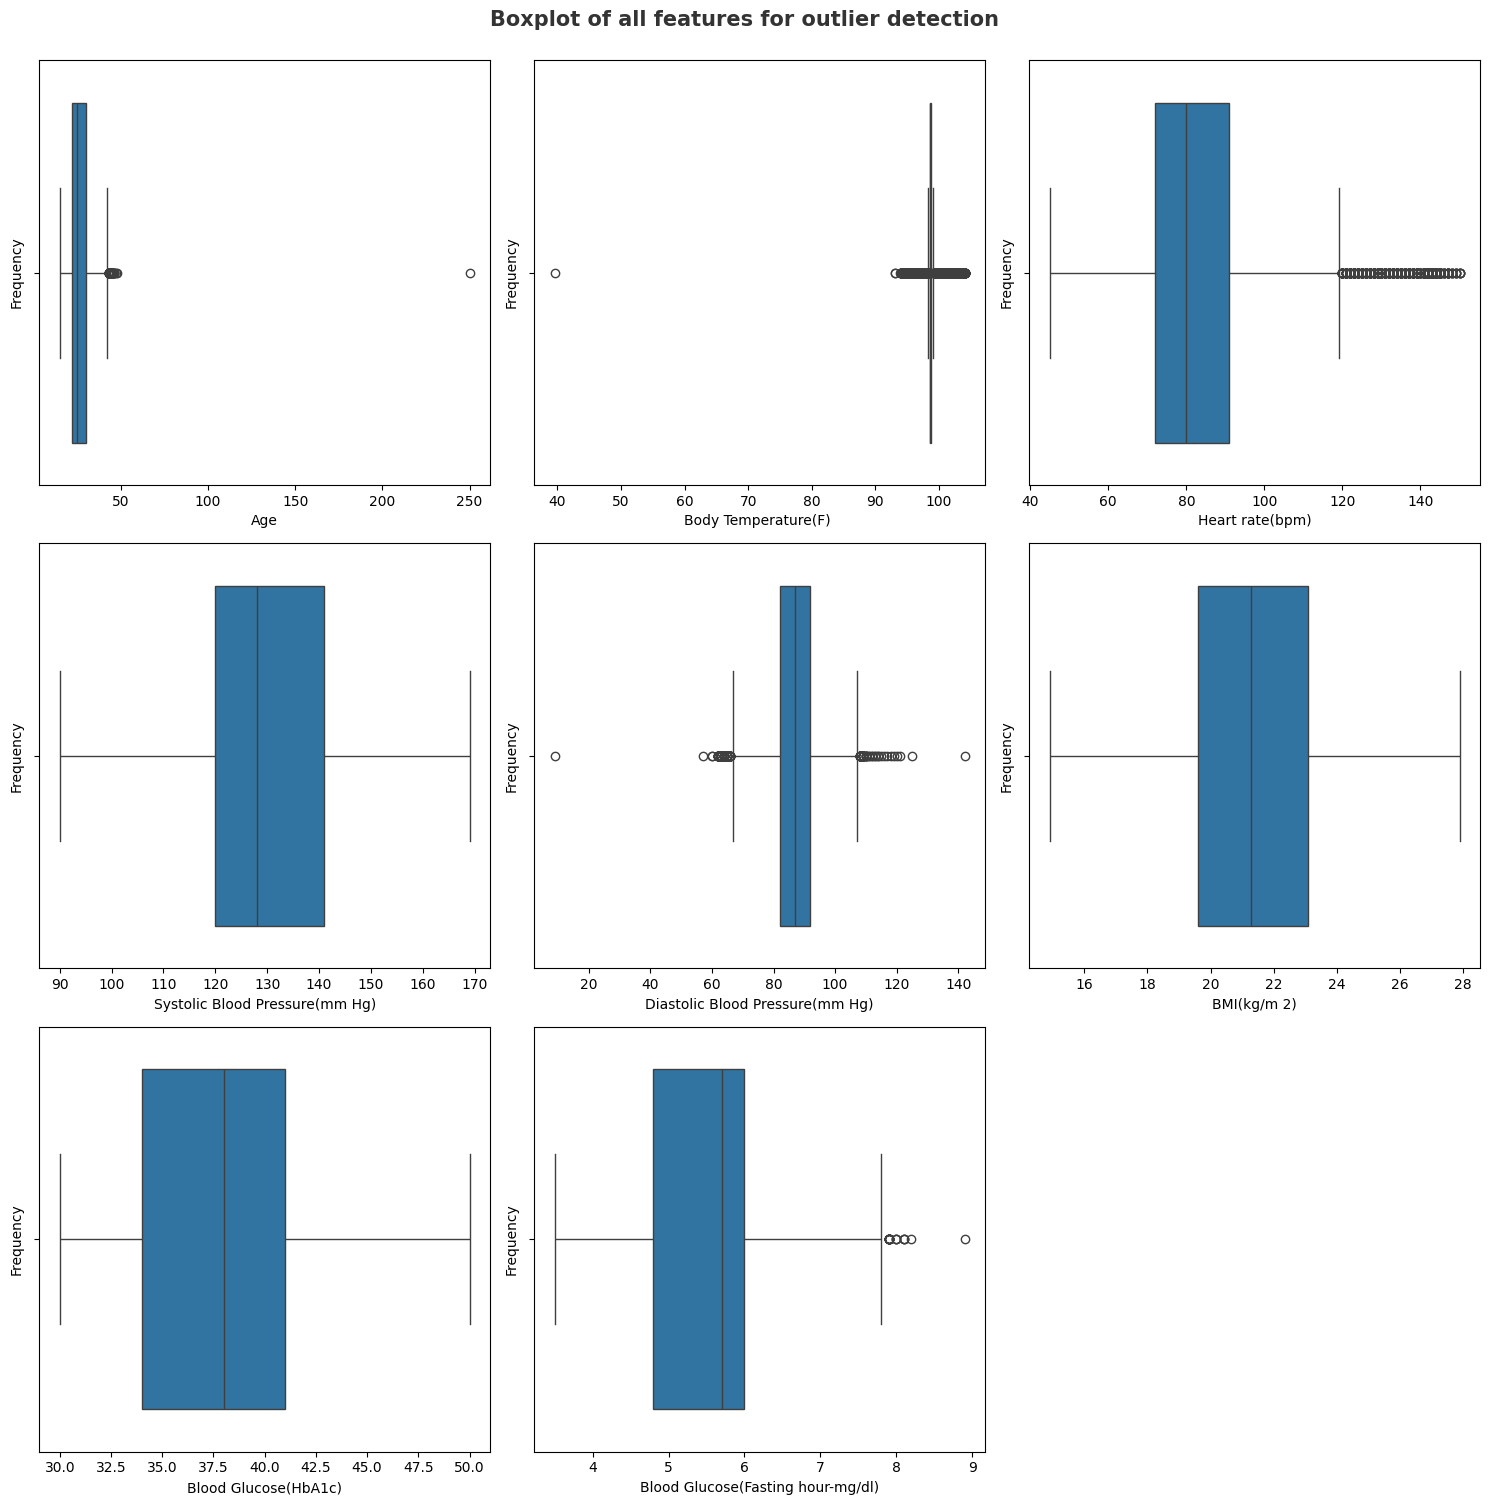

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import math

numerical_cols = ['Age','Body Temperature(F) ','Heart rate(bpm)','Systolic Blood Pressure(mm Hg)','Diastolic Blood Pressure(mm Hg)',	'BMI(kg/m 2)',	'Blood Glucose(HbA1c)','Blood Glucose(Fasting hour-mg/dl)']

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  

for idx, col in enumerate(numerical_cols):

    # Plot the histogram
    sns.boxplot(x=dataset[col], ax=axes[idx])

    # Set labels
    axes[idx].set(xlabel=col, ylabel='Frequency')


# If there are empty plots, remove them
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.suptitle('Boxplot of all features for outlier detection', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

In [32]:
#Removing of Outliers
dataset.drop(dataset[dataset['Age'] > 100].index, inplace=True)
dataset.drop(dataset[dataset['Body Temperature(F) '] <50].index, inplace=True)

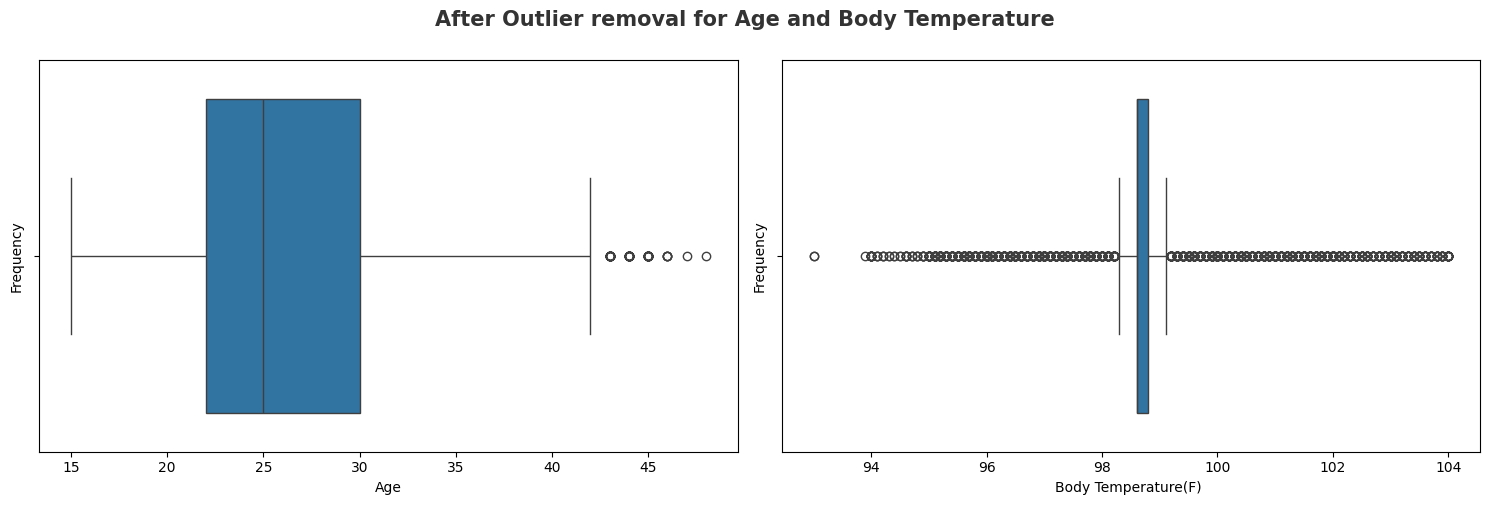

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import math

# Define the specific numerical columns to include
numerical_cols1 = ['Age','Body Temperature(F) ']

# Create subplots: Two histograms per row
n_cols = 2
n_rows = math.ceil(len(numerical_cols1) / n_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten axes array for easy iteration

for idx, col in enumerate(numerical_cols1):

    # Plot the histogram
    sns.boxplot(x=dataset[col], ax=axes[idx])

    # Set labels
    axes[idx].set(xlabel=col, ylabel='Frequency')


# If there are empty plots, remove them
for i in range(len(numerical_cols1), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.suptitle('After Outlier removal for Age and Body Temperature', fontsize=15, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

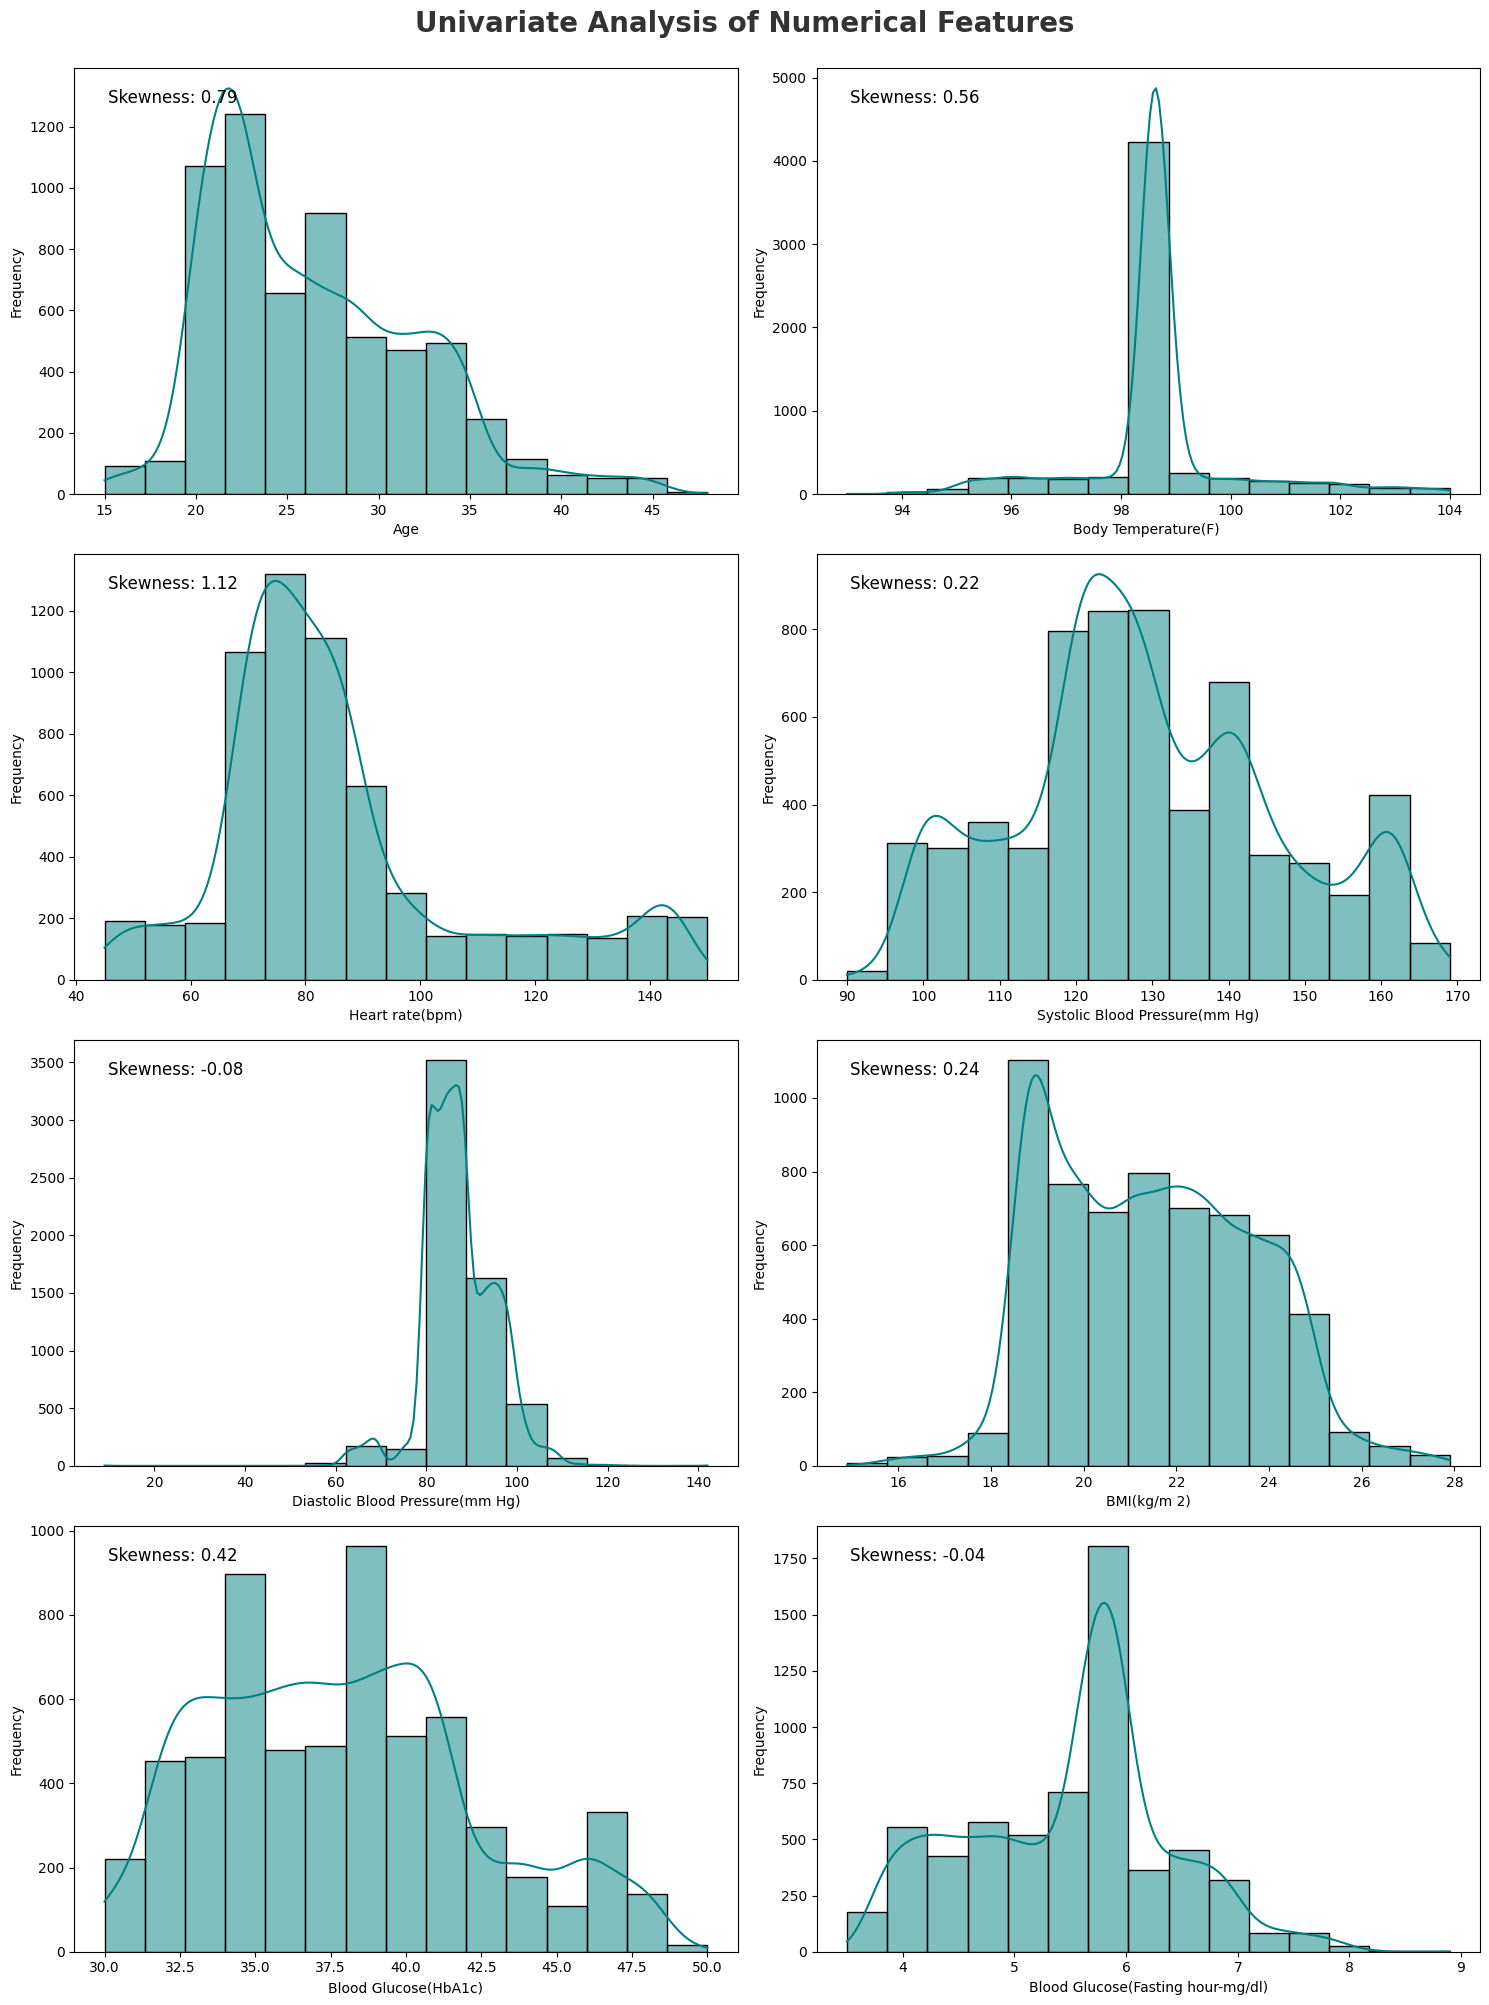

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import math

# Calculate the number of rows needed
n_cols = 2
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Create subplots with two histograms per row
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each column and create a histogram
for idx, col in enumerate(numerical_cols):
    # Calculate skewness for the column
    skewness_value = skew(dataset[col].dropna())  # Drop NaN values to avoid errors

    # Plot the histogram
    sns.histplot(x=dataset[col], color='teal', bins=15, kde=True, ax=axes[idx])

    # Set labels
    axes[idx].set(xlabel=col, ylabel='Frequency')

    # Annotate the plot with the skewness value
    axes[idx].text(0.05, 0.95, f'Skewness: {skewness_value:.2f}',
                   transform=axes[idx].transAxes,
                   fontsize=12, verticalalignment='top', color='black')

# If there are extra subplots (empty plots), remove them
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.show()

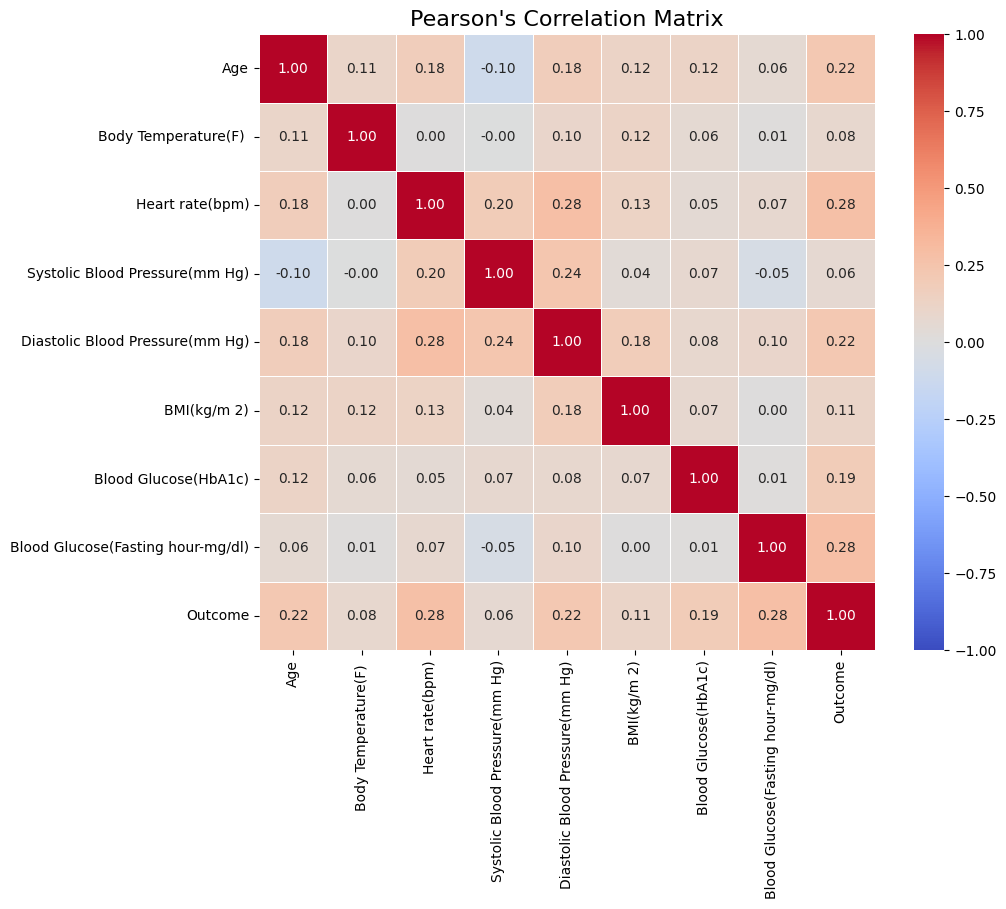

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate Spearman's correlation matrix
spearman_corr = dataset.corr(method='pearson')

# Set the plot size
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations and a color map
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)

# Add a title
plt.title("Pearson's Correlation Matrix", fontsize=16)

# Display the plot
plt.show()

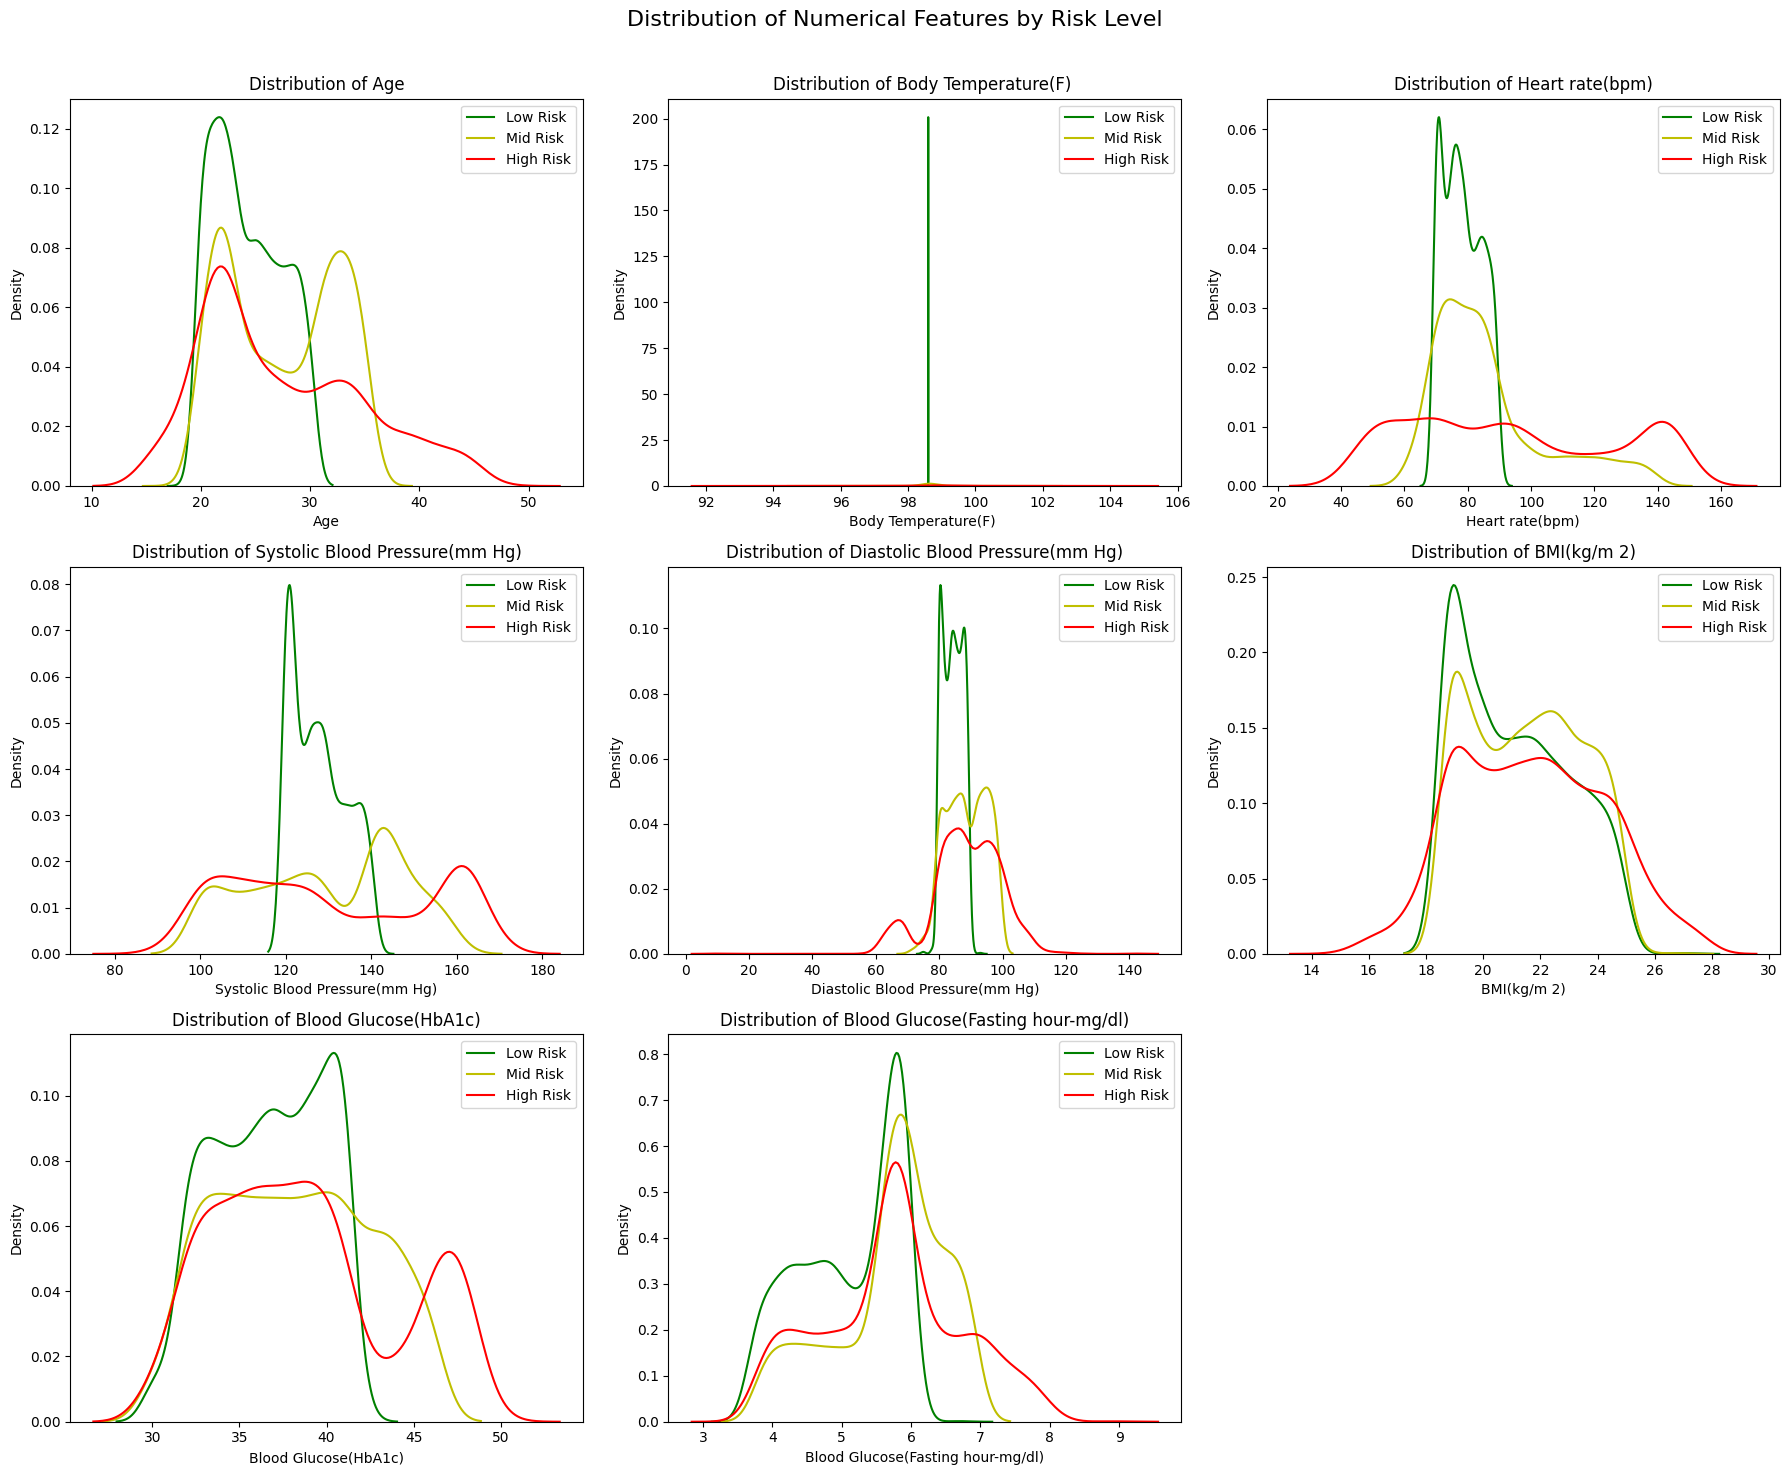

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns excluding 'Outcome'
numerical_features = dataset.select_dtypes(include=['number']).drop('Outcome', axis=1).columns

# Set up the figure
num_plots = len(numerical_features)
plots_per_row = 3
rows = (num_plots // plots_per_row) + int(num_plots % plots_per_row > 0)

plt.figure(figsize=(18, rows * 5))  # Adjust figsize to fit plots

# Iterate through features and plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, plots_per_row, i)
    sns.kdeplot(dataset[dataset['Outcome'] == 0][feature], label='Low Risk', color='g')
    sns.kdeplot(dataset[dataset['Outcome'] == 1][feature], label='Mid Risk', color='y')
    sns.kdeplot(dataset[dataset['Outcome'] == 2][feature], label='High Risk', color='r')
    plt.suptitle('Distribution of Numerical Features by Risk Level\n\n', fontsize=16)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


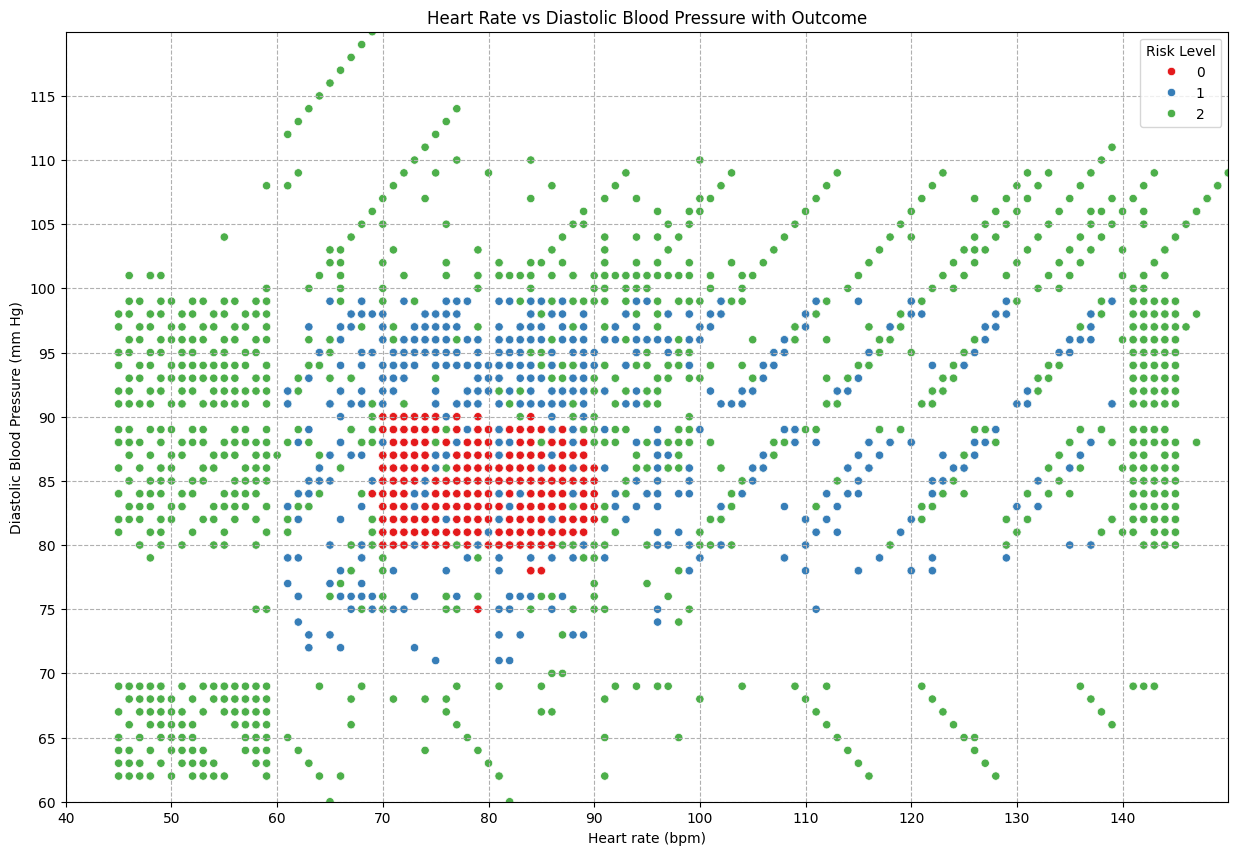

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2D scatter plot with Outcome as hue
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Heart rate(bpm)', y='Diastolic Blood Pressure(mm Hg)', hue='Outcome', data=dataset, palette='Set1')
plt.xlim(40, 150)  # Set X-axis range
plt.xticks(range(40, 150, 10))  # Set tick values (every 10 units)
plt.ylim(60, 120)  # Set Y-axis range
plt.yticks(range(60, 120, 5))  # Set tick values (every 10 units)

# Title and labels
plt.title('Heart Rate vs Diastolic Blood Pressure with Outcome')
plt.xlabel('Heart rate (bpm)')
plt.ylabel('Diastolic Blood Pressure (mm Hg)')

# Show legend
plt.legend(title='Risk Level')
plt.grid(True, linestyle='--', alpha=1)
# Show plot
plt.show()

In [38]:
# A woman with 80-90 mm Hg diastolic pressure could be low, mid, or high risk unless the heart rate is between 70-80 bpm, where she is more likely to be low risk.

# High Risk (Risk Level 2)

# Diastolic Pressure: Below 60 mm Hg or above 120 mm Hg. Heart Rate: Below 50 bpm or above 130 bpm. Combination: High heart rate (> 100 bpm) regardless of diastolic pressure tends to indicate high risk.

# Mid Risk (Risk Level 1)

# Diastolic Pressure: Around 80-100 mm Hg. Heart Rate: 60-100 bpm. Combination: Often found in the middle range of both heart rate and diastolic pressure, where there is overlap with low and high risk. Specific combinations like heart rate > 100 bpm with pressure 60-70 mm Hg indicate mid risk. In short, extremes in values often indicate high risk, while mid-range values overlap and are harder to classify, but tend toward mid risk.

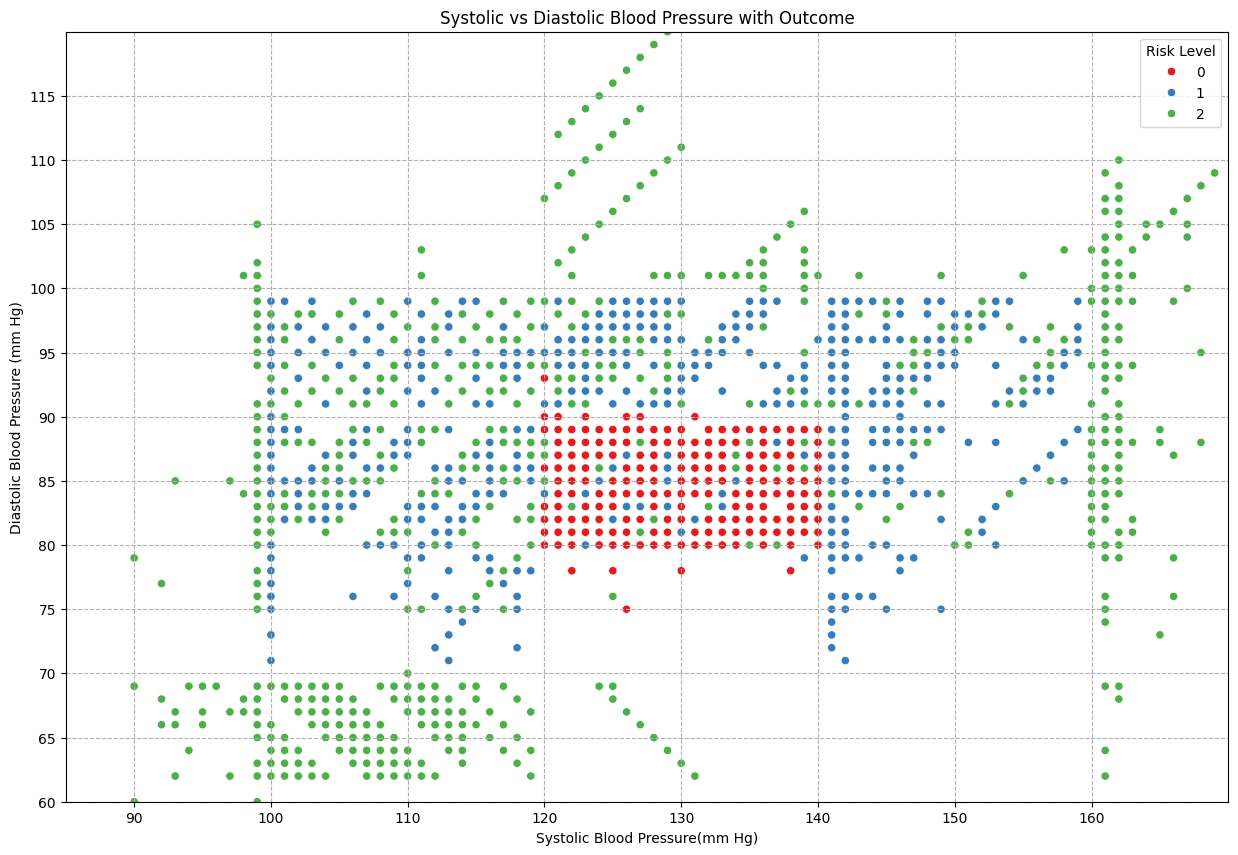

In [39]:

# 2D scatter plot with Outcome as hue
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Systolic Blood Pressure(mm Hg)', y='Diastolic Blood Pressure(mm Hg)', hue='Outcome', data=dataset, palette='Set1')
plt.xlim(85,170)  # Set X-axis range
plt.xticks(range(90, 170, 10))  # Set tick values (every 10 units)
plt.ylim(60, 120)  # Set Y-axis range
plt.yticks(range(60, 120, 5))  # Set tick values (every 10 units)

# Title and labels
plt.title('Systolic vs Diastolic Blood Pressure with Outcome')
plt.xlabel('Systolic Blood Pressure(mm Hg)')
plt.ylabel('Diastolic Blood Pressure (mm Hg)')

# Show legend
plt.legend(title='Risk Level')
plt.grid(True, linestyle='--', alpha=1)
# Show plot
plt.show()

In [40]:
# Diastolic Pressure 80-90 mm Hg:

# Cannot clearly determine risk without considering systolic pressure. If Systolic Pressure is 120-140 mm Hg, there’s a high chance of low risk.

# High Systolic Pressure (>150 mm Hg) + Low Diastolic Pressure (<70 mm Hg). This combination strongly indicates high risk.

# Diastolic Pressure 80-100 mm Hg + Varying Systolic Pressure Most likely falls into mid-risk, especially when systolic pressure is neither extremely low nor extremely high

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=dataset.drop('Outcome',axis=1)
y=dataset['Outcome']
scaler.fit(X)
X_scale = scaler.transform(X)
X_scaled = pd.DataFrame(X_scale, columns=X.columns)

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

ModuleNotFoundError: No module named 'sklearn'

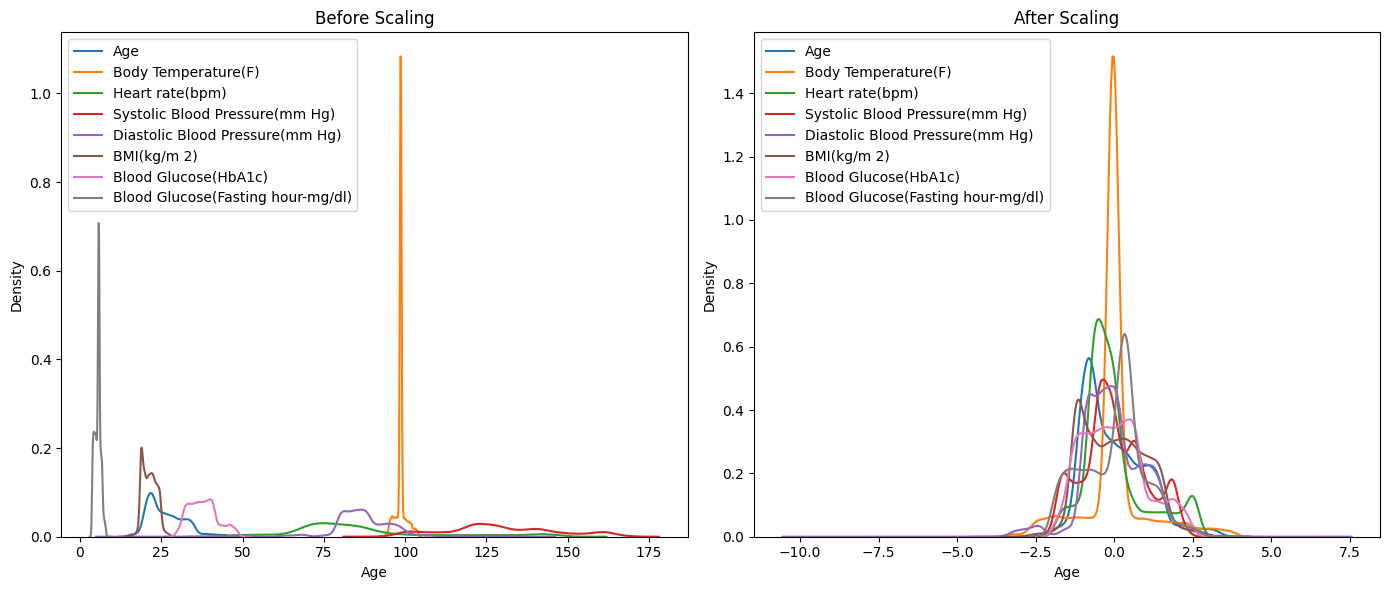

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define your features
columns_to_plot = ['Age','Body Temperature(F) ','Heart rate(bpm)','Systolic Blood Pressure(mm Hg)','Diastolic Blood Pressure(mm Hg)',	'BMI(kg/m 2)',	'Blood Glucose(HbA1c)','Blood Glucose(Fasting hour-mg/dl)']

# Create a figure for before and after scaling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot all features in a single KDE plot before scaling
ax1.set_title('Before Scaling')
for column in columns_to_plot:
    sns.kdeplot(X[column], ax=ax1, label=column)
ax1.legend()

# Plot all features in a single KDE plot after scaling
ax2.set_title('After Scaling')
for column in columns_to_plot:
    sns.kdeplot(X_scaled[column], ax=ax2, label=column)
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_part, y_train, y_part = train_test_split(X_scaled,y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_part, y_part, test_size=0.5, random_state=0)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3660, 8)
Validation set shape: (1220, 8)
Test set shape: (1221, 8)


In [ ]:
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_val = pd.DataFrame(X_val, columns=X_val.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

In [ ]:
np.round(X_train.describe())

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
count,3660.0,3660.0,3660.0,3660.0,3660.0,3660.0,3660.0,3660.0
mean,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-4.0,-2.0,-2.0,-4.0,-3.0,-2.0,-2.0
25%,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
75%,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
max,4.0,4.0,3.0,2.0,7.0,3.0,3.0,3.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the Classifiers
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
logreg_model = LogisticRegression(random_state=42, max_iter=10000)
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions on the Training data
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_xgb = xgb_model.predict(X_train)
y_train_pred_knn = knn_model.predict(X_train)
y_train_pred_logreg = logreg_model.predict(X_train)
y_train_pred_gb = gb_model.predict(X_train)

# Calculate accuracy on the training data
accuracy_rf_train = accuracy_score(y_train, y_train_pred_rf)
accuracy_xgb_train = accuracy_score(y_train, y_train_pred_xgb)
accuracy_knn_train = accuracy_score(y_train, y_train_pred_knn)
accuracy_logreg_train = accuracy_score(y_train, y_train_pred_logreg)
accuracy_gb_train = accuracy_score(y_train, y_train_pred_gb)

In [ ]:
# Make predictions on the Training data
y_pred = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_logreg = logreg_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy
accuracy_rf_scl = accuracy_score(y_test, y_pred)
accuracy_xgb_scl = accuracy_score(y_test, y_pred_xgb)
accuracy_knn_scl = accuracy_score(y_test, y_pred_knn)
accuracy_logreg_scl = accuracy_score(y_test, y_pred_logreg)
accuracy_gb_scl = accuracy_score(y_test, y_pred_gb)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_logreg = logreg_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy
accuracy_rf_scl = accuracy_score(y_test, y_pred)
accuracy_xgb_scl = accuracy_score(y_test, y_pred_xgb)
accuracy_knn_scl = accuracy_score(y_test, y_pred_knn)
accuracy_logreg_scl = accuracy_score(y_test, y_pred_logreg)
accuracy_gb_scl = accuracy_score(y_test, y_pred_gb)

In [ ]:
# Make predictions on the validation set
valy_pred = rf_model.predict(X_val)
valy_pred_xgb = xgb_model.predict(X_val)
valy_pred_knn = knn_model.predict(X_val)
valy_pred_logreg = logreg_model.predict(X_val)
valy_pred_gb = gb_model.predict(X_val)

# Calculate accuracy of validation
accval_rf = accuracy_score(y_val, valy_pred)
accval_xgb = accuracy_score(y_val, valy_pred_xgb)
accval_knn = accuracy_score(y_val, valy_pred_knn)
accval_logreg = accuracy_score(y_val, valy_pred_logreg)
accval_gb = accuracy_score(y_val, valy_pred_gb)

In [ ]:
# Define column width for aligned printing
column_width = 70

# Print headers
print(f"{'Train Accuracy':<{column_width}}{'Test Accuracy':<{column_width}}{'Validation Accuracy':<{column_width}}")
print("=" * (column_width * 3))

# Print results
print(f"Random Forest Train Accuracy: {accuracy_rf_train * 100:.2f}%".ljust(column_width) +
      f"Random Forest Test Accuracy: {accuracy_rf_scl * 100:.2f}%".ljust(column_width) +
      f"Random Forest Val Accuracy: {accval_rf * 100:.2f}%")

print(f"XGBoost Train Accuracy: {accuracy_xgb_train * 100:.2f}%".ljust(column_width) +
      f"XGBoost Test Accuracy: {accuracy_xgb_scl * 100:.2f}%".ljust(column_width) +
      f"XGBoost Val Accuracy: {accval_xgb * 100:.2f}%")

print(f"KNN Train Accuracy: {accuracy_knn_train * 100:.2f}%".ljust(column_width) +
      f"KNN Test Accuracy: {accuracy_knn_scl * 100:.2f}%".ljust(column_width) +
      f"KNN Val Accuracy: {accval_knn * 100:.2f}%")

print(f"Logistic Regression Train Accuracy: {accuracy_logreg_train * 100:.2f}%".ljust(column_width) +
      f"Logistic Regression Test Accuracy: {accuracy_logreg_scl * 100:.2f}%".ljust(column_width) +
      f"Logistic Regression Val Accuracy: {accval_logreg * 100:.2f}%")

print(f"Gradient Boosting Train Accuracy: {accuracy_gb_train * 100:.2f}%".ljust(column_width) +
      f"Gradient Boosting Test Accuracy: {accuracy_gb_scl * 100:.2f}%".ljust(column_width) +
      f"Gradient Boosting Val Accuracy: {accval_gb * 100:.2f}%")


Train Accuracy                                                        Test Accuracy                                                         Validation Accuracy                                                   
Random Forest Train Accuracy: 100.00%                                 Random Forest Test Accuracy: 98.94%                                   Random Forest Val Accuracy: 99.18%
XGBoost Train Accuracy: 100.00%                                       XGBoost Test Accuracy: 99.26%                                         XGBoost Val Accuracy: 99.02%
KNN Train Accuracy: 93.47%                                            KNN Test Accuracy: 88.86%                                             KNN Val Accuracy: 90.25%
Logistic Regression Train Accuracy: 56.26%                            Logistic Regression Test Accuracy: 55.86%                             Logistic Regression Val Accuracy: 55.00%
Gradient Boosting Train Accuracy: 99.23%                              Gradient Boosting Test Accura

In [ ]:
from sklearn.metrics import classification_report

# Generate classification reports
report_rf = classification_report(y_test, y_pred)
report_xgb = classification_report(y_test, y_pred_xgb)
report_knn = classification_report(y_test, y_pred_knn)
report_logreg = classification_report(y_test, y_pred_logreg)
report_gb = classification_report(y_test, y_pred_gb)

# Function to format reports side by side with model names
def side_by_side_reports_with_names(name1, report1, name2, report2):
    lines1 = [f"{name1} Classification Report"] + report1.split("\n")
    lines2 = [f"{name2} Classification Report"] + report2.split("\n")

    max_lines = max(len(lines1), len(lines2))
    combined_report = ""

    for i in range(max_lines):
        left = lines1[i] if i < len(lines1) else ""
        right = lines2[i] if i < len(lines2) else ""
        combined_report += f"{left:<80} {right}\n"

    return combined_report

# Printing the reports in two columns
print(side_by_side_reports_with_names("Random Forest", report_rf, "XGBoost", report_xgb))
print("\n" + "=" * 200 + "\n")
print(side_by_side_reports_with_names("KNN", report_knn, "Logistic Regression", report_logreg))
print("\n" + "=" * 200 + "\n")
print("Gradient Boosting Classification Report")
print(report_gb)

Random Forest Classification Report                                              XGBoost Classification Report
              precision    recall  f1-score   support                                          precision    recall  f1-score   support
                                                                                 
           0       0.99      1.00      0.99       391                                       0       0.98      1.00      0.99       391
           1       0.99      0.99      0.99       420                                       1       1.00      0.99      0.99       420
           2       1.00      0.98      0.99       410                                       2       1.00      1.00      1.00       410
                                                                                 
    accuracy                           0.99      1221                                accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score


# Creating the Random Forest model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set the number of folds for K-fold cross-validation
k = 5  # You can adjust this to your needs
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation and get the accuracy scores for each fold
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')

# Print the results
print(f"Cross-validation scores for {k} folds: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard deviation of accuracy: {np.std(cv_scores):.2f}")

# Fit the model on the entire dataset to get a final classification report
xgb_model.fit(X_scaled, y)

# Predicting on the whole dataset (optional, based on requirement)
y_pred = xgb_model.predict(X_scaled)

# Generating classification report (optional, based on requirement)
print("Classification Report (on entire dataset):\n", classification_report(y, y_pred))
     

Cross-validation scores for 5 folds: [0.99099099 0.99262295 0.99590164 0.99016393 0.99180328]
Mean accuracy: 0.99
Standard deviation of accuracy: 0.00
Classification Report (on entire dataset):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      1.00      1.00      2043
           2       1.00      1.00      1.00      2059

    accuracy                           1.00      6101
   macro avg       1.00      1.00      1.00      6101
weighted avg       1.00      1.00      1.00      6101



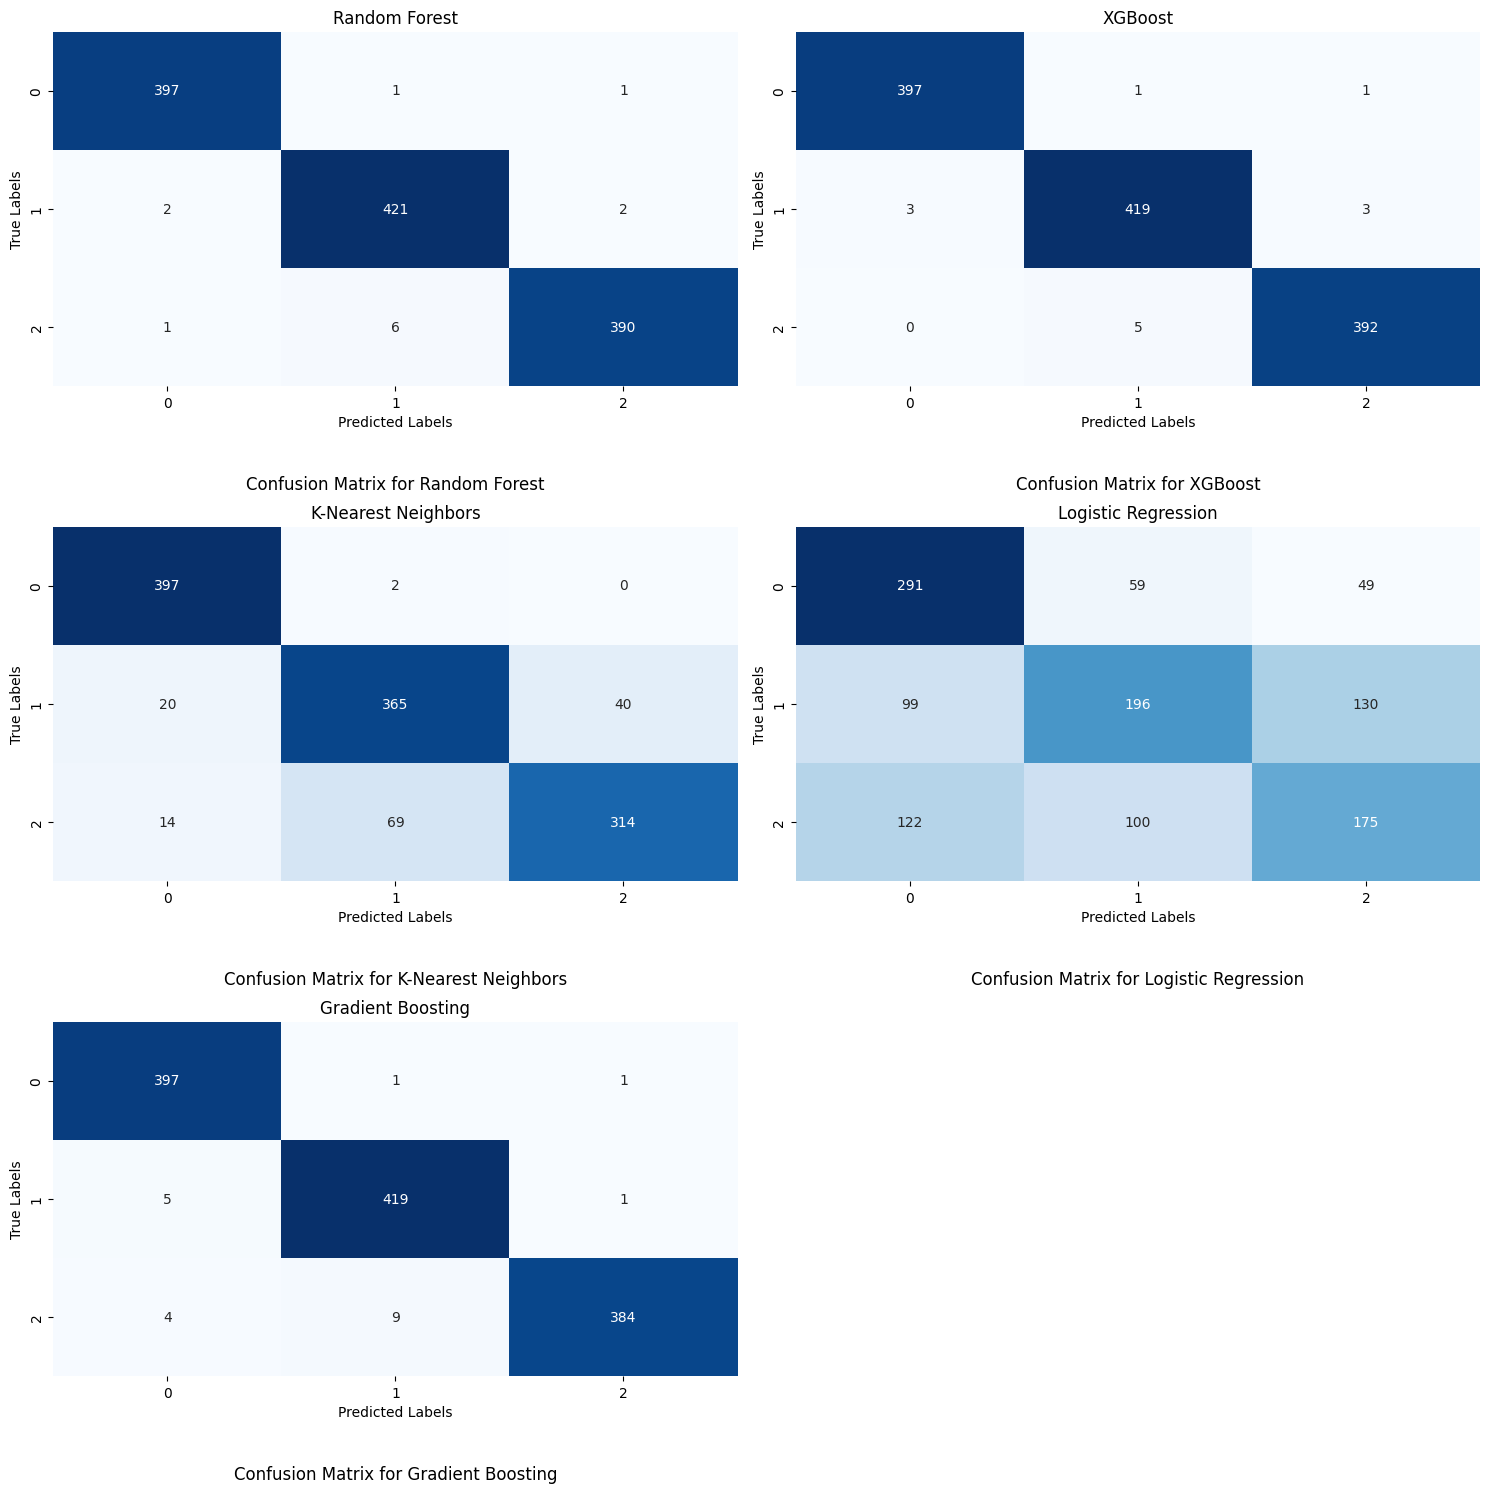

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import math

# Example dataset split (replace X, y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate models
model_rf = RandomForestClassifier(random_state=42)
model_xgb = XGBClassifier(random_state=42)
model_knn = KNeighborsClassifier()
model_logreg = LogisticRegression()
model_gb = GradientBoostingClassifier(random_state=42)

# Train models
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_logreg.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

# Generate predictions
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_logreg = model_logreg.predict(X_test)
y_pred_gb = model_gb.predict(X_test)

# Compute confusion matrices
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Combine matrices with titles
conf_matrices = [
    (conf_matrix_rf, "Random Forest"),
    (conf_matrix_xgb, "XGBoost"),
    (conf_matrix_knn, "K-Nearest Neighbors"),
    (conf_matrix_logreg, "Logistic Regression"),
    (conf_matrix_gb, "Gradient Boosting")
]

# Define layout parameters
n_cols = 2
n_rows = math.ceil(len(conf_matrices) / n_cols)

# Create subplots with two confusion matrices per row
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each confusion matrix with title and caption
for idx, (conf_matrix, title) in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[idx])
    axes[idx].set_title(title)
    axes[idx].set_xlabel("Predicted Labels")
    axes[idx].set_ylabel("True Labels")

    # Add caption below each matrix
    caption = f"Confusion Matrix for {title}"
    axes[idx].text(0.5, -0.25, caption, ha='center', va='top', transform=axes[idx].transAxes, fontsize=12)

# Remove any extra subplots if the grid is uneven
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


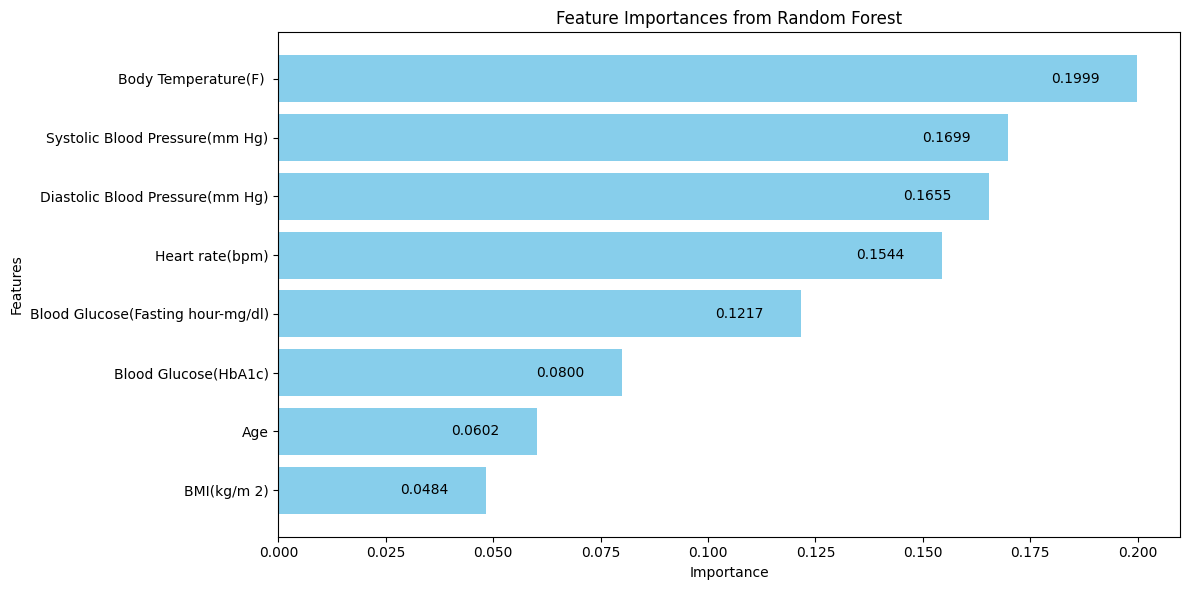

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming rf_model is your trained Random Forest model
importances = xgb_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)  # Sort for better visualization

# Plotting the feature importances
plt.figure(figsize=(12, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

# Annotate each bar with its value
for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 0.02,  # Position to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically on the bar
        f'{width:.4f}',  # Format to 4 decimal places
        va='center',
        ha='left'  # Align text to the left of the bar
    )

plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()  # Adjusts layout to prevent clipping of labels
plt.show()

In [ ]:
# Define pregnancy-specific normal ranges
pregnancy_normal_ranges = {
    "Age": (18, 35),
    "Body Temperature(F) ": (97, 99),
    "Heart rate(bpm)": (70, 110),
    "Systolic Blood Pressure(mm Hg)": (110, 120),
    "Diastolic Blood Pressure(mm Hg)": (70, 80),
    "BMI(kg/m 2)": (18.5, 24.9),
    "Blood Glucose(HbA1c)": (0,42),  # Only upper limit for HbA1c
    "Blood Glucose(Fasting hour-mg/dL)": (3.3, 5.1),
}

# Define risk level function
def risk_level(outcome):
    if outcome == 0:
        return "Low Risk"
    elif outcome == 1:
        return "Mid Risk"
    elif outcome == 2:
        return "High Risk"
    else:
        return "Unknown Risk"

# Function to explain risk factors
def explain_risk_factors(user_input):
    explanations = []
    for feature, value in user_input.items():
        if feature in pregnancy_normal_ranges:
            low, high = pregnancy_normal_ranges[feature]
            if value < low:
                explanations.append(f"Low {feature} ({value}) raises the risk during pregnancy.")
            elif value > high:
                explanations.append(f"High {feature} ({value}) raises the risk during pregnancy.")
    return explanations

# Function to take user input, scale it, and predict risk level
def predict_risk_with_factors():
    print("\nPlease enter the following details:")
    user_input = {
        "Age": float(input("Age: ")),
        "Body Temperature(F) ": float(input("Body Temperature(F): ")),  # Changed key
        "Heart rate(bpm)": float(input("Heart rate(bpm): ")),  # Changed key
        "Systolic Blood Pressure(mm Hg)": float(input("Systolic Blood Pressure(mm Hg): ")),  # Changed key
        "Diastolic Blood Pressure(mm Hg)": float(input("Diastolic Blood Pressure(mm Hg): ")),  # Changed key
        "BMI(kg/m 2)": float(input("BMI (kg/m^2): ")),  # Changed key
        "Blood Glucose(HbA1c)": float(input("Blood Glucose(HbA1c): ")),  # Changed key
        "Blood Glucose(Fasting hour-mg/dl)": float(input("Blood Glucose(Fasting hour-mg/dl): "))  # Changed key
    }

    # Combine inputs into an array for model prediction
    feature_order = [
        "Age",
        "Body Temperature(F) ",  # Changed order
        "Heart rate(bpm)",  # Changed order
        "Systolic Blood Pressure(mm Hg)",  # Changed order
        "Diastolic Blood Pressure(mm Hg)",  # Changed order
        "BMI(kg/m 2)",  # Changed order
        "Blood Glucose(HbA1c)",  # Changed order
        "Blood Glucose(Fasting hour-mg/dl)"  # Changed order
    ]
    input_array = [[user_input[feature] for feature in feature_order]]
    input_scaled = scaler.transform(input_array)
    # Convert the scaled array to a DataFrame using the same feature order
    input_df = pd.DataFrame(input_scaled, columns=feature_order)

    # Predict the outcome using the XGBoost model
    predicted_outcome = xgb_model.predict(input_df)


    # Get risk level and contributing factors
    risk = risk_level(predicted_outcome)

    # Display results
    if predicted_outcome == 0:  # Low Risk
        print("\nPredicted Risk Level: Low Risk")
        print("Normal, Everything looks fine.")
    else:  # Mid or High Risk
        print(f"\nPredicted Risk Level: {risk}")
        explanations = explain_risk_factors(user_input)
        if explanations:
            print("\nContributing Factors:")
            for explanation in explanations:
                print(f"- {explanation}")
        else:
            print("No specific contributing factors identified.")

# Main loop for user interaction
while True:
    print("\t--- Pregnancy Risk Prediction Menu ---")
    print("1. Enter new data for prediction")
    print("2. Exit")
    choice = input("Choose an option (1 or 2): ")

    if choice == '1':
        predict_risk_with_factors()
        print('-'*200)
    elif choice == '2':
        print("Exiting the program. Thank you!\n")
        print('-'*200)
        break
    else:
        print("Invalid choice. Please select 1 or 2.")

	--- Pregnancy Risk Prediction Menu ---
1. Enter new data for prediction
2. Exit


Choose an option (1 or 2):  1



Please enter the following details:


Age:  29
Body Temperature(F):  98.6
Heart rate(bpm):  84
Systolic Blood Pressure(mm Hg):  129
Diastolic Blood Pressure(mm Hg):  87
BMI (kg/m^2):  19
Blood Glucose(HbA1c):  42
Blood Glucose(Fasting hour-mg/dl):  6.4



Predicted Risk Level: Mid Risk

Contributing Factors:
- High Systolic Blood Pressure(mm Hg) (129.0) raises the risk during pregnancy.
- High Diastolic Blood Pressure(mm Hg) (87.0) raises the risk during pregnancy.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	--- Pregnancy Risk Prediction Menu ---
1. Enter new data for prediction
2. Exit


Choose an option (1 or 2):  1



Please enter the following details:


Age:  28
Body Temperature(F):  98.6
Heart rate(bpm):  79
Systolic Blood Pressure(mm Hg):  136
Diastolic Blood Pressure(mm Hg):  87
BMI (kg/m^2):  23.7
Blood Glucose(HbA1c):  34
Blood Glucose(Fasting hour-mg/dl):  4.4



Predicted Risk Level: Low Risk
Normal, Everything looks fine.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	--- Pregnancy Risk Prediction Menu ---
1. Enter new data for prediction
2. Exit


Choose an option (1 or 2):  2


Exiting the program. Thank you!

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
import pickle

# Define the filename for the pickle file
XGBmodel = 'xgboost_model.pkl'

# Save the XGBoost model to a .pkl file
with open(XGBmodel, 'wb') as file:
    pickle.dump(xgb_model, file)

print(f"XGBoost model saved as {XGBmodel}")


XGBoost model saved as xgboost_model.pkl
